In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
columns_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [11]:
#separate data by tab line
df = pd.read_csv('u.data', sep='\t',names=columns_names)

In [12]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


# build data frame

In [13]:
#add movie titles to df
movie_titles = pd.read_csv('Movie_Id_Titles')

#merge two dataframes - add title column
df = pd.merge(df, movie_titles, on='item_id')

df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [38]:
#data frame of mean rating for each title
bestratings = df.groupby('title')['rating'].mean()

#show movies with best ratings
bestratings.sort_values(ascending=False).head()

#data frame of movies with most rating
mostratings = df.groupby('title')['rating'].count()

#show movies with most ratings
mostratings.sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [42]:
#new data frame of title of movie and avg rating
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

#add number of people who rated it - count of ratings
ratings['num ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

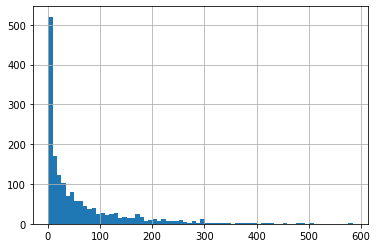

In [43]:
#distribution of ratings
#most movies have few ratings

ratings['num ratings'].hist(bins=70)

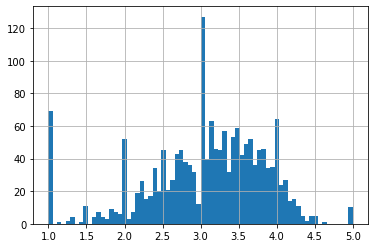

In [45]:
#distribution of ratings

ratings['rating'].hist(bins=70)

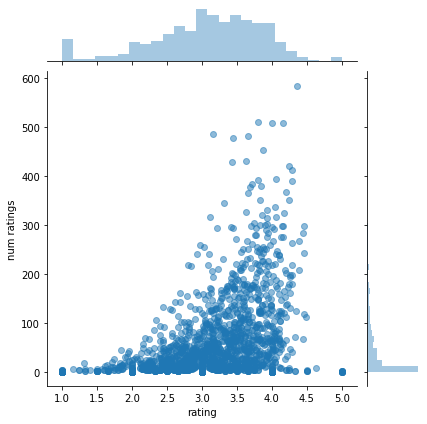

In [46]:
#relationship between average rating and number of rating

sns.jointplot(x='rating', y='num ratings', data=ratings, alpha=0.5)

#more ratings - higher rating of a movie

# build rec system

In [48]:
#matrix with user IDs on one axis, movie titles on another
moviematrix = df.pivot_table(index='user_id', columns='title', values='rating')

#matrix with NaN if they didn't rate it
moviematrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#most rated movies
ratings.sort_values('num ratings', ascending=False).head()

#grab user ratings for two movies
starwars = moviematrix['Star Wars (1977)'] 
liarliar = moviematrix['Liar Liar (1997)']

#series with user id and rating for star wars
starwars.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [55]:
#get correlation between movie ratings
#pairwise correlation between rows/columns of data frame objects

#movies and correlation with star wars / liar liar movie ratings for users
simstarwars = moviematrix.corrwith(starwars)
simliarliar = moviematrix.corrwith(liarliar)

In [60]:
#clean - make dataframe

corrstarwars = pd.DataFrame(simstarwars, columns=['Correlation'])
corrstarwars.dropna(inplace=True)

#index is title of movie, correlation between user ratings of each movie and star wars
corrstarwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [62]:
#titles most correlated with star wars ratings
corrstarwars.sort_values('Correlation', ascending=False).head()

#filter out movies with few reviews
#use 100 reviews as minimum number of reviews a movie should have

#add number of ratings to correlation data frame
#use join because title is index
corrstarwars = corrstarwars.join(ratings['num ratings'])

#show data frame of all movies with more than 100 ratings
#sort by correlation
corrstarwars[corrstarwars['num ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,num ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [66]:
#do the same with liar liar

#create data frame from series
corrliarliar = pd.DataFrame(simliarliar, columns=['Correlation'])

#drop null vals
corrliarliar.dropna(inplace=True)

#get num of ratings
corrliarliar = corrliarliar.join(ratings['num ratings'])

corrliarliar

,Correlation,num ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
...,...,...
Young Guns (1988),0.410988,101
Young Guns II (1990),0.352174,44
"Young Poisoner's Handbook, The (1995)",0.445016,41


In [73]:
#show most highly correlated movies with more than 100 ratings
corrliarliar[corrliarliar['num ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,num ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
